## Quality of Service (QoS) Prediction in Multi-Domain Environments
### Introduction
In today's interconnected world, multi-domain environments are common, where applications and services span across multiple networks and systems. Ensuring an optimal Quality of Service (QoS) is essential for providing users with reliable and efficient performance. QoS prediction is the process of estimating the expected performance of a service based on various factors like network conditions, historical data, and system parameters.

### Problem Statement
Accurately predicting QoS in multi-domain environments is challenging due to the following factors:

Heterogeneity of domains: Different domains may have varied infrastructure, protocols, and configurations.

Dynamic nature of networks: Frequent changes in network conditions make it hard to maintain accurate predictions.

Complex interdependencies: QoS in one domain can be affected by changes in another domain.
Objectives
### The primary goals of this project are:

To analyze the factors affecting QoS in multi-domain environments.

To implement machine learning models for predicting QoS parameters such as latency, throughput, and reliability.

To evaluate the model's accuracy and applicability across different domains.

In [85]:
import os
import pandas as pd
import numpy as np
from typing import Union, List, Literal, Dict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [86]:
# Filepath to the dataset directory
Filepath = 'C:/Users/gnapika/Downloads/5gproject/Dataset'

# Setting pandas option to display maximum column width (useful for debugging and exploring data)
pd.set_option('display.max_colwidth', 200)

## Data Loading and Setup


In [87]:
# Function to load data from the specified file path
def Load_Data(file_path: str) -> List[pd.DataFrame]:
    """
    Loads the training, testing, and variable definition datasets from the given file path.

    Args:
    file_path (str): Path to the directory containing the dataset files.

    Returns:
    List[pd.DataFrame]: A list containing three dataframes:
        1. train: Training dataset
        2. test: Testing dataset
        3. variables: Definitions of variables in the dataset
    """
    # Reading the training dataset
    train = pd.read_csv(file_path + '/Train.csv')
    
    # Reading the testing dataset
    test = pd.read_csv(file_path + '/Test.csv')
    
    # Reading the variable definitions file
    variables = pd.read_csv(file_path + '/VariableDefinitions.csv')

    # Returning the three datasets as a list
    return train, test, variables

# Loading the datasets
Train, Test, Variables = Load_Data(Filepath)

### Data Exploration

In [89]:
Train.head(3)

,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,Id_qt2qn56050,1624367008,pc1,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,Residential,51500000.0
1,Id_f1zf07cwb6,1624372465,pc3,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,Residential,50300000.0
2,Id_uoxdz7di5b,1624371871,pc3,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,Residential,16500000.0


In [90]:
Test.head(3)

,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area
0,Id_ln0e0hfrgx,1624374179,pc2,-97.121875,-12.923750,-87.554375,13.293,39276.0,24.0,20,...,23.05,14.55,0.59,1013.6,2.27,0.83,3.0,16.093,3.07702,Avenue
1,Id_svf7nz9fxv,1624366264,pc4,-65.202500,-9.944375,-35.501875,21.823,39566.0,25.0,20,...,21.56,13.92,0.62,1013.6,2.42,0.95,4.0,16.093,0.66000,Park
2,Id_ww2mh07gwj,1624375795,pc2,-79.298125,-17.468750,-74.823750,24.114,41900.0,27.0,20,...,22.93,14.65,0.60,1013.5,2.26,0.85,3.0,16.093,2.49330,Park


In [91]:
Train.select_dtypes(include=['object']).columns
Test.select_dtypes(include=['object']).columns

Index(['id', 'device', 'area'], dtype='object')

## Visualizing Missing Values in the Training Dataset
Missing data is a common issue in datasets, and identifying columns with significant missing values is critical for data preprocessing. This section includes:

### Calculation of Missing Values:

The proportion of missing values is calculated for each column using the formula:
Missing Value Proportion =   Number of Missing Entries / Total Number of Rows

​The columns are then sorted in descending order of missing values for visualization.
Normalization and Color Mapping:

The missing value proportions are normalized to a range between 0 and 1.

A colormap (Blues) is used to assign colors to bars in the bar chart, with darker shades representing higher proportions of missing values.

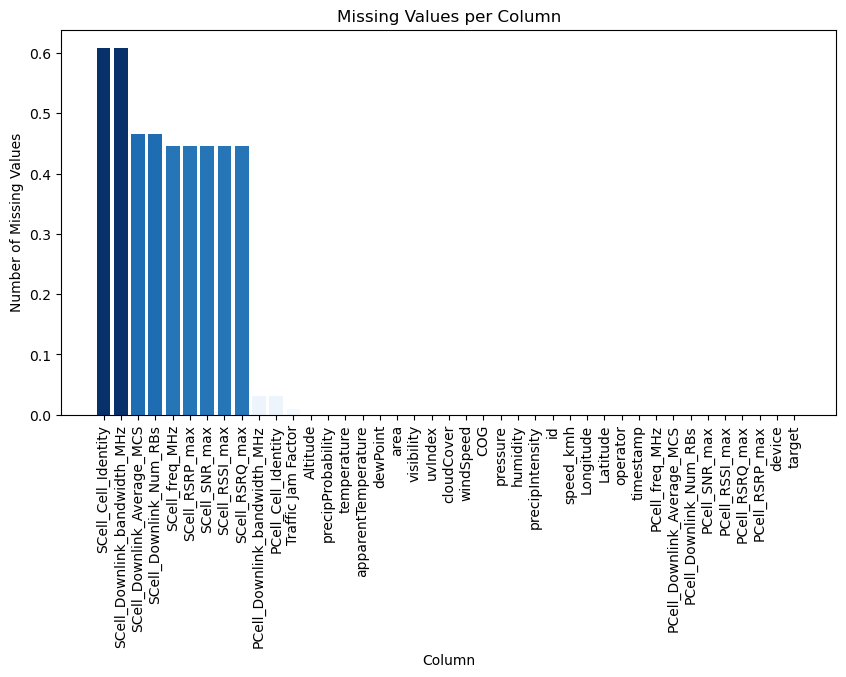

In [92]:
# Calculating the proportion of missing values for each column in the training dataset
missing_values = Train.isna().sum() / Train.shape[0]

# Sorting the columns based on the proportion of missing values in descending order
missing_values = missing_values.sort_values(ascending=False)

# Normalizing the missing values to be between 0 and 1 for visualization
norm = plt.Normalize(missing_values.values.min(), missing_values.values.max())

# Creating a colormap for visualizing the bars (Blues color scheme)
cmap = cm.ScalarMappable(norm=norm, cmap='Blues')

# Generating colors for each bar based on the proportion of missing values
colors = [cmap.to_rgba(val) for val in missing_values.values]

# Plotting a bar chart of missing values
plt.figure(figsize=(10, 5))  # Setting the figure size
plt.bar(missing_values.index, missing_values.values, color=colors)  # Bar plot
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.xlabel('Column')  # Label for x-axis
plt.ylabel('Proportion of Missing Values')  # Label for y-axis
plt.title('Missing Values per Column')  # Title of the plot
plt.show()  # Display the plot


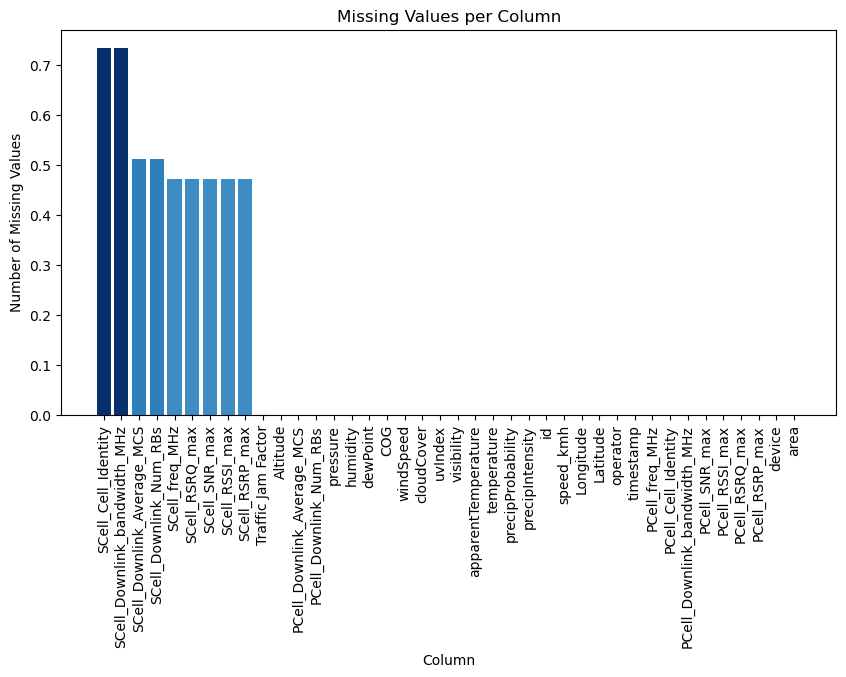

In [93]:
missing_values = Test.isna().sum()/ Test.shape[0]
missing_values = missing_values.sort_values(ascending=False)
import matplotlib.cm as cm

# Normalize the data to be between 0 and 1
norm = plt.Normalize(missing_values.values.min(), missing_values.values.max())
# Create a colormap
cmap = cm.ScalarMappable(norm=norm, cmap='Blues')
# Generate colors for each bar
colors = [cmap.to_rgba(val) for val in missing_values.values]

# Create bar plot of missing values
plt.figure(figsize=(10,5))
plt.bar(missing_values.index, missing_values.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

## Baseline Score


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, Dataset, early_stopping
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from abc import ABC, abstractmethod
import random

In [95]:
from catboost import CatBoostRegressor, Pool

In [96]:
Sscaler = StandardScaler()
Mmscaler = MinMaxScaler()
cbc = CatBoostRegressor(eval_metric='RMSE',learning_rate=0.08,depth=9)

# BaselineScore Class

The `BaselineScore` class is designed for evaluating a CatBoostRegressor model on structured data, with support for train-test splits and K-Fold cross-validation.

## Key Features

1. **Initialization**
   - Validates inputs (model type, scaler, and training data).
   - Initializes core attributes like the training data, model, scaler, split method, and more.

2. **`run` Method**
   - Executes the evaluation process using either train-test split or K-Fold cross-validation.

3. **Evaluation Methods**
   - Train-Test Split: Splits data into training and testing sets, scales features, and evaluates the model.
   - K-Fold Cross-Validation: Splits data into K folds, evaluates the model on each fold, and computes RMSE for each fold.

4. **Model Training**
   - Fits the CatBoostRegressor model and updates feature importances.

5. **Visualization**
   - Generates a horizontal bar chart of the top N feature importances.

## Attributes

- **train**: The training data (pandas DataFrame).
- **model**: An instance of CatBoostRegressor.
- **scaler**: Scaler for feature normalization (e.g., StandardScaler or MinMaxScaler), optional.
- **split_method**: Method for splitting data (`train_test_split` or `KFold`).
- **return_baseline**: Flag to indicate whether baseline scores should be returned alongside RMSE.
- **num_splits**: Number of folds for K-Fold cross-validation.
- **random_seed**: Random seed for reproducibility.
- **verbose**: Logging level for verbosity.

## Methods

### Initialization
Validates input types and sets up the class attributes for evaluation.

### run
Determines the evaluation strategy (train-test split or K-Fold) and executes it. Returns the evaluation metric (RMSE) and optionally baseline predictions.

### Train-Test Split
- Splits data into training and testing sets.
- Scales features if a scaler is provided.
- Trains the CatBoostRegressor model on the training data and evaluates it on the testing data.

### K-Fold Cross-Validation
- Splits data into multiple folds.
- Trains and evaluates the model on each fold.
- Computes the average RMSE across all folds.

### Feature Importance Plot
- Creates a bar chart to display the top N feature importances.
- Normalizes importance values for better visualization.

## Visualization Example

The feature importance chart highlights the most influential features in the dataset, helping identify key drivers of the model's predictions.



In [97]:
class BaselineScore:

    def __init__(
        self,
        train_data: pd.DataFrame,
        model: CatBoostRegressor,
        scaler: Union[StandardScaler, MinMaxScaler, None] = None,
        split_method: Literal["KFold", "train_test_split"] = "KFold",
        return_baseline: bool = True,
        num_splits: int = 5,
        random_seed: int = 42,
        verbose: int = 0
    ):
        # Validate the model type
        if not isinstance(model, CatBoostRegressor):
            raise TypeError("Only CatBoostRegressor is supported.")
        # Validate the scaler type if provided
        if scaler and not isinstance(scaler, (StandardScaler, MinMaxScaler)):
            raise TypeError("Scaler must be StandardScaler, MinMaxScaler, or None.")
        # Validate that the training data is a pandas DataFrame
        if not isinstance(train_data, pd.DataFrame):
            raise TypeError("Training data must be a pandas DataFrame.")

        # Initialize class attributes
        self.train = train_data
        self.model = model
        self.scaler = scaler
        self.split_method = split_method
        self.return_baseline = return_baseline
        self.num_splits = num_splits
        self.random_seed = random_seed
        self.verbose = verbose
        self.feature_importances = np.zeros(train_data.shape[1] - 1)
        self.baseline_scores = {}
        random.seed(random_seed)
        np.random.seed(random_seed)

    def run(self):
        """
        Main method to execute the evaluation process.
        Splits the data and evaluates the model using the specified split method.
        """
        X = self.train.iloc[:, :-1]  # Extract features
        y = self.train.iloc[:, -1]  # Extract target

        if self.split_method == "train_test_split":
            return self._train_test_split(X, y)
        else:
            return self._kfold_split(X, y)

    def _train_test_split(self, X, y):
        """
        Handles evaluation using a train-test split.
        """
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=self.random_seed
        )

        # Scale features if scaler is provided
        if self.scaler:
            X_train = self.scaler.fit_transform(X_train)
            X_test = self.scaler.transform(X_test)

        # Train the model and make predictions
        self._train_model(X_train, y_train, X_test, y_test)
        preds = self.model.predict(X_test)
        train_preds = self.model.predict(X)
        self.baseline_scores["train"] = train_preds

        # Calculate RMSE
        score = mean_squared_error(y_test, preds, squared=False)

        if self.verbose > 0:
            print(f"Train-Test Split RMSE: {score}")

        return (score, self.baseline_scores) if self.return_baseline else score

    def _kfold_split(self, X, y):
        """
        Handles evaluation using K-Fold Cross Validation.
        """
        kfold = KFold(n_splits=self.num_splits, shuffle=True, random_state=self.random_seed)
        scores = []

        for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Scale features if scaler is provided
            if self.scaler:
                X_train = self.scaler.fit_transform(X_train)
                X_test = self.scaler.transform(X_test)

            # Train the model and make predictions
            self._train_model(X_train, y_train, X_test, y_test)
            preds = self.model.predict(X_test)
            train_preds = self.model.predict(X)
            self.baseline_scores[f"fold_{fold_idx}_train"] = train_preds

            # Calculate RMSE
            score = mean_squared_error(y_test, preds, squared=False)
            scores.append(score)

            if self.verbose > 0:
                print(f"Fold {fold_idx} RMSE: {score}")

        # Calculate the average RMSE across all folds
        avg_score = np.mean(scores)

        if self.verbose > 0:
            print(f"Average KFold RMSE: {avg_score}")

        return (avg_score, self.baseline_scores) if self.return_baseline else avg_score

    def _train_model(self, X_train, y_train, X_test, y_test):
        """
        Trains the CatBoost model and updates feature importances.
        """
        self.model.fit(
            X_train,
            y_train,
            eval_set=(X_test, y_test),
            use_best_model=True,
            early_stopping_rounds=20,
            verbose=self.verbose,
        )
        self.feature_importances += self.model.feature_importances_

    def plot_feature_importances(self, top_n=40):
        """
        Visualizes the top N feature importances using a horizontal bar chart.
        """
        feature_data = pd.DataFrame({
            "Feature": self.train.columns[:-1],
            "Importance": self.feature_importances
        }).sort_values(by="Importance", ascending=False).head(top_n)

        # Normalize feature importances for visualization
        norm = plt.Normalize(feature_data["Importance"].min(), feature_data["Importance"].max())
        cmap = cm.ScalarMappable(norm=norm, cmap="Reds")
        colors = [cmap.to_rgba(val) for val in feature_data["Importance"]]

        # Plot feature importances
        plt.figure(figsize=(12, 8))
        plt.barh(feature_data["Feature"], feature_data["Importance"], color=colors)
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Top Feature Importances")
        plt.gca().invert_yaxis()  # Invert y-axis for better visualization
        plt.show()


# BaselinePredict Class

The `BaselinePredict` class extends the `BaselineScore` class to add functionality for making predictions and generating submission files.

## Key Features

1. **Initialization**
   - Inherits from `BaselineScore`.
   - Adds a `self.predictions` attribute to store predictions.

2. **`predict` Method**
   - Supports both **Train-Test Split** and **KFold Cross-Validation** for making predictions.
   - Returns either predictions or a tuple of predictions and basedict.create_submission(test_data)
print(submission_df)


In [98]:

class BaselinePredict(BaselineScore):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.predictions = None

    def predict(self, test_data):
        X = self.train.iloc[:, :-1]
        y = self.train.iloc[:, -1]

        if self.split_method == "train_test_split":
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.1, random_state=self.random_seed
            )

            if self.scaler:
                X_train = self.scaler.fit_transform(X_train)
                X_test = self.scaler.transform(X_test)

            # Train the model with CatBoostRegressor
            self.model.fit(
                X_train,
                y_train,
                eval_set=(X_test, y_test),
                use_best_model=True,
                early_stopping_rounds=20,
                verbose=self.verbose,
            )

            train_baseline = self.model.predict(test_data)
            self.baseline_scores["train"] = train_baseline
            self.predictions = self.model.predict(test_data)

            if self.verbose > 0:
                print(f"Split Method: {self.split_method.upper()}")

            return (self.predictions, self.baseline_scores) if self.return_baseline else self.predictions

        else:  # KFold cross-validation
            kfold = KFold(n_splits=self.num_splits, shuffle=True, random_state=self.random_seed)
            fold_predictions = []
            
            for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(X, y), 1):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                if self.scaler:
                    X_train = self.scaler.fit_transform(X_train)
                    X_test = self.scaler.transform(X_test)

                # Train the model with CatBoostRegressor
                self.model.fit(
                    X_train,
                    y_train,
                    eval_set=(X_test, y_test),
                    use_best_model=True,
                    early_stopping_rounds=20,
                    verbose=self.verbose,
                )

                fold_prediction = self.model.predict(test_data)
                fold_predictions.append(fold_prediction)

                train_baseline = self.model.predict(X_test)
                self.baseline_scores[f"fold_{fold_idx}_train"] = train_baseline

                if self.verbose > 0:
                    print(f"Fold {fold_idx} completed.")

            self.predictions = np.mean(fold_predictions, axis=0)

            return (self.predictions, self.baseline_scores) if self.return_baseline else self.predictions

    def create_submission(self, test_data):
        if self.predictions is None:
            raise ValueError("No predictions available. Run the `predict` method first.")

        final_predictions = self.predictions
        submission_df = pd.DataFrame({"id": test_data["id"], "target": final_predictions})
        return submission_df


## Data Preprocessing
1. **Dropping Unnecessary Columns:**
   - The columns `'id'` and `'device'` are dropped from both the training (`TT`) and test (`tests`) datasets as they are not needed for model training.

2. **Encoding Categorical Features:**
   - The `'area'` column is a categorical feature, which is transformed using the `OrdinalEncoder`. This encoder converts the categorical values into numerical values.
   - The transformation is applied to both the training and test datasets.

3. **Handling Missing Data:**
   - Any missing values (NaN) in both the training and test datasets are filled with `0`. This is done using the `fillna` method.

In [99]:
TT = Train.drop(['id','device'],axis=1)
tests = Test.drop(['id','device'], axis=1)

categorical_features = ['area']
oe = OrdinalEncoder()
tests['area'] = oe.fit_transform(tests[['area']])
TT['area'] = oe.fit_transform(TT[['area']])
tests.fillna(0, inplace=True)
TT.fillna(0, inplace=True)

In [100]:
TT.head(3)

,timestamp,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,1624367008,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,26368258.0,1800.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,3.0,51500000.0
1,1624372465,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,2568970.0,1800.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,3.0,50300000.0
2,1624371871,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,2824458.0,1800.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,3.0,16500000.0


In [101]:
TT_1 = TT.sample(frac=1)
TT_1.head(3)

,timestamp,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
28894,1624373796,-74.082500,-12.478125,-40.353750,21.533,38435.0,28.0,20.0,3428105.0,1800.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,8.05296,1.0,25600000.0
13917,1624542070,-97.730625,-15.350000,-62.291875,7.538,96188.0,14.0,20.0,26367489.0,1800.0,...,13.43,0.71,1017.9,1.97,0.99,3.0,16.093,8.80702,0.0,33200000.0
2663,1624354131,-81.581250,-10.125000,-53.066250,10.036,94606.0,19.0,20.0,30827264.0,1800.0,...,13.90,0.73,1012.2,4.23,0.97,4.0,16.093,2.61657,2.0,84600000.0


In [102]:
TT_2 = TT.sample(frac=1)
TT_2.head(3)

,timestamp,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
16174,1624356228,-91.250625,-17.616250,-56.321875,0.817000,91118.0,19.0,20.0,40812803.0,1800.0,...,13.46,0.69,1012.5,4.09,0.96,4.0,16.093,3.14159,1.0,46000000.0
24901,1624374131,-76.191875,-12.397500,-45.368125,13.759000,46681.0,23.0,20.0,3499534.0,2600.0,...,14.55,0.59,1013.6,2.27,0.83,3.0,16.093,4.50427,0.0,36800000.0
19241,1624552824,-86.796717,-13.160354,-55.238005,6.793939,11743.0,25.0,15.0,4051733.0,2000.0,...,13.80,0.73,1017.4,2.43,1.00,1.0,16.093,0.99534,3.0,2720000.0


In [103]:
cbc = CatBoostRegressor(loss_function='RMSE',custom_metric=['RMSE','MAE','Huber:delta=0.5'],learning_rate=0.08,depth=9,n_estimators=5000)
cbc1 = CatBoostRegressor(learning_rate=0.08,eval_metric='RMSE',n_estimators=5000)

## Model Evaluation

This section evaluates the baseline model performance using **K-Fold Cross-Validation** on three different training datasets: `TT`, `TT_1`, and `TT_2`. The evaluation is performed using the `BaselineScore` class.

### Steps:
1. **Evaluate on `TT`:**
   - A `BaselineScore` object is created with the `TT` dataset, and the model (`cbc`), along with K-Fold cross-validation (5 splits), is used to evaluate the performance.
   - The cross-validation RMSE score is printed.

2. **Evaluate on `TT_1`:**
   - Similarly, the baseline model is evaluated on the `TT_1` dataset.

3. **Evaluate on `TT_2`:**
   - Finally, the baseline model is evaluated on the `TT_2` dataset.

### Results:
- The cross-validation RMSE score for `TT`, `TT_1`, and `TT_2` is calculated and printed during the evaluation process. These scores are essential for understanding how well the model generalizes across different datasets.

### Conclusion:
- By performing K-Fold Cross-Validation on each of these datasets, we can assess the stability and performance of the model in diverse conditions. The scores obtained help in determining the effectiveness of the baseline model and identify potential improvements for further iterations.


In [104]:

# Evaluate on TT
print("Evaluating on TT...")
baseline_tt = BaselineScore(
    train_data=TT,
    model=cbc,
    split_method="KFold",
    num_splits=5,
    random_seed=42,
    verbose=200
)
score_tt, bsv_1 = baseline_tt.run()
print(f"Cross-validation RMSE Score (TT): {score_tt}")

# Evaluate on TT_1
print("Evaluating on TT_1...")
baseline_tt1 = BaselineScore(
    train_data=TT_1,
    model=cbc,
    split_method="KFold",
    num_splits=5,
    random_seed=42,
    verbose=200
)
score_tt1, bsv_2 = baseline_tt1.run()
print(f"Cross-validation RMSE Score (TT_1): {score_tt1}")

# Evaluate on TT_2
print("Evaluating on TT_2...")
baseline_tt2 = BaselineScore(
    train_data=TT_2,
    model=cbc,
    split_method="KFold",
    num_splits=5,
    random_seed=42,
    verbose=200
)
score_tt2, bsv_3 = baseline_tt2.run()
print(f"Cross-validation RMSE Score (TT_2): {score_tt2}")


Evaluating on TT...
0:	learn: 40229693.1407268	test: 41193110.6746131	best: 41193110.6746131 (0)	total: 28.3ms	remaining: 2m 21s
200:	learn: 7761521.8209753	test: 9957281.0163720	best: 9957281.0163720 (200)	total: 3.78s	remaining: 1m 30s
400:	learn: 6346921.0864410	test: 9540299.2034997	best: 9540299.2034997 (400)	total: 7.53s	remaining: 1m 26s
600:	learn: 5586958.4351592	test: 9429834.8736687	best: 9429834.8736687 (600)	total: 11.3s	remaining: 1m 22s
800:	learn: 5042847.4866669	test: 9373061.1858002	best: 9373061.1858002 (800)	total: 15s	remaining: 1m 18s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 9352584.717
bestIteration = 927

Shrink model to first 928 iterations.
Fold 1 RMSE: 9352584.717091179
0:	learn: 40425341.6954632	test: 40515802.0144630	best: 40515802.0144630 (0)	total: 43.3ms	remaining: 3m 36s
200:	learn: 7887747.6056133	test: 9547157.6227710	best: 9547157.6227710 (200)	total: 3.83s	remaining: 1m 31s
400:	learn: 6528214.3225612	test: 9155676.2132506	b

## Merging Predictions with Targets for Analysis

merging predictions with actual target values for the datasets `TT`, `TT_1`, and `TT_2`. The predictions are obtained using the `BaselineScore` model evaluation on each dataset. 

### Steps:

1. **Merging Predictions and Targets:**
   - For each dataset (`TT`, `TT_1`, `TT_2`), predictions are stored in `bsv_1`, `bsv_2`, and `bsv_3` respectively.
   - These predictions are then merged with the corresponding target values from each dataset to form a comprehensive analysis data frame.
   
   The merging process for each dataset is as follows:
   - **`TT`:** Predictions from `bsv_1` are merged with the `target` column from `TT`.
   - **`TT_1`:** Predictions from `bsv_2` are merged with the `target` column from `TT_1`.
   - **`TT_2`:** Predictions from `bsv_3` are merged with the `target` column from `TT_2`.

2. **Predicting Using `BaselineScore`:**
   - The `BaselineScore` class is used to evaluate the model on the three datasets, and predictions are generated for each.
   - For each dataset (`TT`, `TT_1`, `TT_2`), a separate instance of `BaselineScore` is created, and the predictions are stored as follows:
     - **`predict_1`**: Predictions for `TT`.
     - **`predict_2`**: Predictions for `TT_1`.
     - **`predict_3`**: Predictions for `TT_2`.

3. **Final Predictions:**
   - After running the predictions, the predictions are stored in data frames:
     - `test_preds`: Data frame containing predictions from `TT`.
     - `test_preds_1`: Data frame containing predictions from `TT_1`.
     - `test_preds_2`: Data frame containing predictions from `TT_2`.

- This process helps in organizing the predictions and their corresponding target values, making it easier to analyze the model's performance across different datasets. These merged data frames will be useful for further analysis and comparison of the baseline model's predictions against the actual target values.


In [105]:
# Merging predictions with targets for analysis
KFold_preds = pd.DataFrame(bsv_1).join(TT['target'])
KFold_preds_1 = pd.DataFrame(bsv_2).join(TT_1['target'].reset_index(drop=True))
KFold_preds_2 = pd.DataFrame(bsv_3).join(TT_2['target'].reset_index(drop=True))

# Predict using BaselineScore
Baseline = BaselineScore(train_data=TT, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_1, bsv_test1 = Baseline.run()

Baseline = BaselineScore(train_data=TT_1, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_2, bsv_test2 = Baseline.run()

Baseline = BaselineScore(train_data=TT_2, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_3, bsv_test3 = Baseline.run()

# If you only need TT, TT_1, and TT_2
test_preds = pd.DataFrame(bsv_test1)
test_preds_1 = pd.DataFrame(bsv_test2)
test_preds_2 = pd.DataFrame(bsv_test3)


## Creating and Using BaselineScore Instances for KFold Predictions
 Co create multiple `BaselineScore` instances to generate predictions for various datasets, followed by an ensemble prediction combining results from different sets. The final predictions are saved to a CSV file.

### Steps:

1. **Creating BaselineScore Instances for `TT`, `TT_1`, and `TT_2`:**
   - `BaselineScore` is used to evaluate the model on `TT`, `TT_1`, and `TT_2` datasets using KFold cross-validation with 5 splits.
   - Predictions are generated for each dataset and stored in:
     - `predict_1` for `TT`
     - `predict_2` for `TT_1`
     - `predict_3` for `TT_2`

2. **Creating BaselineScore Instances for KFold Prediction Sets:**
   - The same approach is followed to generate predictions for the KFold prediction datasets (`KFold_preds`, `KFold_preds_1`, `KFold_preds_2`).
   - The predictions are stored in:
     - `predict_11` for `KFold_preds`
     - `predict_12` for `KFold_preds_1`
     - `predict_13` for `KFold_preds_2`

3. **Ensemble Prediction:**
   - The final ensemble prediction is computed by averaging the predictions from all 6 datasets.
   - The logic divides each prediction by 5 (the number of splits in KFold) and adds them together.
   - After combining, the total is divided by 6 (since 6 predictions are considered in total) to get the ensemble prediction.
   
   The formula for ensemble prediction is:
   ```python
   ensemble_pred = (predict_1 / 5 + predict_2 / 5 + predict_3 / 5 + predict_11 / 5 + predict_12 / 5 + predict_13 / 5) / 6


In [106]:
# Create BaselineScore instances and predict for each KFold prediction set
Baseline = BaselineScore(train_data=TT, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_1, bsv_test1 = Baseline.run()

Baseline = BaselineScore(train_data=TT_1, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_2, bsv_test2 = Baseline.run()

Baseline = BaselineScore(train_data=TT_2, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_3, bsv_test3 = Baseline.run()

# Create BaselineScore instances for KFold predictions
Baseline = BaselineScore(train_data=KFold_preds, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_11, bsv_test11 = Baseline.run()

Baseline = BaselineScore(train_data=KFold_preds_1, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_12, bsv_test12 = Baseline.run()

Baseline = BaselineScore(train_data=KFold_preds_2, model=cbc, split_method='KFold', num_splits=5, return_baseline=True, verbose=0, random_seed=0)
predict_13, bsv_test13 = Baseline.run()


In [107]:
# Assuming predict_1, predict_2, etc., are numpy arrays or lists of predictions

# Ensemble prediction logic without using sum() if the predictions are single values
ensemble_pred = (
    predict_1 / 5
    + predict_2 / 5
    + predict_3 / 5
    + predict_11 / 5
    + predict_12 / 5
    + predict_13 / 5
)

ensemble_pred /= 6  # Since there are 6 predictions in total


In [ ]:
predictions_df = pd.DataFrame({'id': Test.id, 'target': ensemble_pred})
predictions_df.to_csv('predictions_.csv',index=False)

## Baseline Score Calculation and KFold Cross-Validation for Ensemble Predictions
to calculate baseline scores using KFold cross-validation for two different datasets (`TT` and `TT_1`) with separate models. The results from each dataset are then joined with the target values, and predictions are generated for ensemble modeling. The final predictions are averaged to form an ensemble prediction.

### Steps:

1. **Baseline Score Calculation for `TT` Dataset:**
   - A `BaselineScore` instance is created with the `TT` dataset and `cbc` model.
   - KFold cross-validation with 15 splits is used, and the baseline score is computed.
   - The score is printed to thre}")
     ```

2. **Joining Predictions with Target for `TT` Dataset:**
   - The KFold predictions (`bsv_1`) are converted into a DataFrame and joined with the target (drop=True))
     ```

3. **Baseline Score Calculation for `TT_1` Dataset:**
   - A similar process is followed for the `TT_1` dataset, but this time with the `cbc1` model.
   - The baseline score for `TT_1` is computed us_Score: {lgb_score}")
     ```

4. **Joining Predictions with Target for `TT_1` Dataset:**
   - The KFold predictions (`bsv_2`) for `TT_1` are joined witet'].reset_index(drop=True))
     ```

5. **Generating Predictions for Ensemble Modeling:**
   - Predictions are generated for both `TT` and `TT_1` using KFold cross-validation with the same `cbc` and `cbc1` models.
   - The resulting predictions are stored in:
     - `predict_1` for `TT`
     - `predict_2` for `TT_1`
     - These p)
     testpreds_2 = pd.DataFrame(bsv_test2)
     ```

6. **Ensemble Prediction Calculation:**
   - The ensemble prediction is calculated by averaging the predictions from `predict_1` and `predict_2`, each divided by the number of splits (15). This     ensemble_pred = predict_1 / 15 + predict_2 / 15
     ```

7. **Final Ensemble Prediction Average:**
   - The final ensemble prediction is computed by averaging the predictions from als):
     ```python
     final_preds = ensemble_pred / 4
     ```

8. **Setting 'target' Column for `Test` DataFrame and Concatenating:**
   - The 'target' column for the `Test` DataFrame is sdictive performance by leveraging the strengths of different datasets and models.


In [109]:
# Baseline score calculation with KFold for TT dataset
Baseline = BaselineScore(train_data=TT, model=cbc, split_method='KFold', return_baseline=True, num_splits=15, verbose=0, random_seed=0)
lgb_score, bsv_1 = Baseline.run()
print(f"CV_RMSE_Score: {lgb_score}")

# Join the predictions with the target for TT dataset
KFold_preds = pd.DataFrame(bsv_1)
KFold_preds = KFold_preds.join(TT['target'].reset_index(drop=True))

# Baseline score calculation with KFold for TT_1 dataset
Baseline = BaselineScore(train_data=TT_1, model=cbc1, split_method='KFold', return_baseline=True, num_splits=15, verbose=0, random_seed=0)
lgb_score, bsv_2 = Baseline.run()
print(f"CV_RMSE_Score: {lgb_score}")



CV_RMSE_Score: 9004529.671676641
CV_RMSE_Score: 9122855.162185319


In [110]:
KFold_preds

,fold_1_train,fold_2_train,fold_3_train,fold_4_train,fold_5_train,fold_6_train,fold_7_train,fold_8_train,fold_9_train,fold_10_train,fold_11_train,fold_12_train,fold_13_train,fold_14_train,fold_15_train,target
0,4.911212e+07,4.997141e+07,5.038887e+07,4.777371e+07,5.000889e+07,4.906035e+07,4.611638e+07,4.933328e+07,4.933788e+07,4.983185e+07,4.841095e+07,4.945701e+07,4.948269e+07,5.016541e+07,4.832313e+07,51500000.0
1,5.515009e+07,5.512422e+07,5.457974e+07,5.660656e+07,5.539878e+07,5.544092e+07,5.582264e+07,5.469939e+07,5.506281e+07,5.524594e+07,5.559869e+07,5.575912e+07,5.582410e+07,5.557166e+07,5.598492e+07,50300000.0
2,1.650192e+07,1.609919e+07,1.660484e+07,1.532047e+07,1.652037e+07,1.591328e+07,1.683997e+07,1.588407e+07,1.638441e+07,1.640928e+07,1.624947e+07,1.677312e+07,1.560796e+07,1.700835e+07,1.566024e+07,16500000.0
3,4.851854e+07,4.778758e+07,4.680283e+07,4.798551e+07,4.633922e+07,4.854467e+07,4.635127e+07,4.826072e+07,4.731832e+07,4.714321e+07,4.826182e+07,4.960504e+07,4.893980e+07,4.771560e+07,4.813236e+07,46400000.0
4,4.501195e+07,4.312499e+07,4.398662e+07,4.323162e+07,4.301606e+07,4.476121e+07,4.212220e+07,4.392559e+07,4.226986e+07,4.406494e+07,4.422500e+07,4.468383e+07,4.354153e+07,4.309390e+07,4.396859e+07,50200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34269,8.106336e+07,7.871500e+07,7.976371e+07,7.971241e+07,8.191186e+07,8.332056e+07,7.865067e+07,8.370615e+07,7.927876e+07,7.842394e+07,8.178371e+07,8.118180e+07,8.129168e+07,7.777502e+07,7.930034e+07,78800000.0
34270,2.208278e+07,2.245486e+07,2.097774e+07,2.153509e+07,2.207868e+07,2.140976e+07,2.134512e+07,2.355888e+07,2.273142e+07,2.223577e+07,2.215596e+07,2.154740e+07,2.234410e+07,2.199899e+07,2.067914e+07,25000000.0
34271,3.805139e+07,3.550488e+07,3.775873e+07,3.492819e+07,3.525067e+07,3.658848e+07,3.816674e+07,3.744475e+07,3.914187e+07,3.759524e+07,3.693693e+07,3.700327e+07,3.750947e+07,3.686602e+07,3.678457e+07,36300000.0
34272,5.256668e+07,5.343640e+07,5.345977e+07,5.516248e+07,5.354308e+07,5.578938e+07,5.340745e+07,5.445608e+07,5.414998e+07,5.336575e+07,5.397381e+07,5.496542e+07,5.611522e+07,5.313135e+07,5.451034e+07,52800000.0


In [111]:
# Join the predictions with the target for TT_1 dataset
KFold_preds_1 = pd.DataFrame(bsv_2)
KFold_preds_1 = KFold_preds_1.join(TT_1['target'].reset_index(drop=True))

# Predictions using KFold for ensemble
predictions = BaselineScore(train_data=TT, model=cbc, split_method='KFold', return_baseline=True, num_splits=15, verbose=0, random_seed=0)
predict_1, bsv_test1 = predictions.run()

predictions = BaselineScore(train_data=TT_1, model=cbc1, split_method='KFold', return_baseline=True, num_splits=15, verbose=0, random_seed=0)
predict_2, bsv_test2 = predictions.run()


testpreds_1 = pd.DataFrame(bsv_test1)
testpreds_2 = pd.DataFrame(bsv_test2)

In [112]:
KFold_preds_1

,fold_1_train,fold_2_train,fold_3_train,fold_4_train,fold_5_train,fold_6_train,fold_7_train,fold_8_train,fold_9_train,fold_10_train,fold_11_train,fold_12_train,fold_13_train,fold_14_train,fold_15_train,target
0,2.816353e+07,2.540531e+07,2.842324e+07,2.774273e+07,2.819307e+07,2.987144e+07,2.880149e+07,2.815674e+07,2.733922e+07,2.701337e+07,2.569757e+07,3.135004e+07,2.799819e+07,2.642148e+07,2.550834e+07,25600000.0
1,3.300042e+07,3.526222e+07,3.459722e+07,3.498577e+07,3.545533e+07,3.565106e+07,3.456781e+07,3.630533e+07,3.472772e+07,3.458586e+07,3.684256e+07,3.599317e+07,3.442804e+07,3.574476e+07,3.467208e+07,33200000.0
2,7.650304e+07,7.806848e+07,8.042245e+07,7.820837e+07,8.231458e+07,7.862916e+07,8.323187e+07,8.033762e+07,8.095270e+07,7.926761e+07,7.860164e+07,8.196347e+07,7.953039e+07,7.961981e+07,8.010269e+07,84600000.0
3,2.475042e+07,2.458523e+07,2.449199e+07,2.476736e+07,2.511016e+07,2.385154e+07,2.473272e+07,2.400146e+07,2.469628e+07,2.329098e+07,2.498774e+07,2.393936e+07,2.329335e+07,2.335816e+07,2.477217e+07,30400000.0
4,5.548070e+07,5.659600e+07,5.582896e+07,5.219864e+07,5.458461e+07,5.389646e+07,5.345755e+07,5.542618e+07,5.435451e+07,5.352178e+07,5.569134e+07,5.594214e+07,5.386477e+07,5.521570e+07,5.300863e+07,54700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34269,2.335291e+07,2.211430e+07,2.549138e+07,2.378723e+07,2.428814e+07,2.297495e+07,2.369693e+07,2.455889e+07,2.382055e+07,2.110726e+07,2.236228e+07,2.154137e+07,2.253430e+07,2.334161e+07,2.277708e+07,20100000.0
34270,3.538518e+07,3.338824e+07,3.417760e+07,3.325957e+07,3.321869e+07,3.516295e+07,3.477418e+07,3.499530e+07,3.392981e+07,3.322710e+07,3.472192e+07,3.497246e+07,3.439781e+07,3.333029e+07,3.499618e+07,37400000.0
34271,5.960881e+07,5.731919e+07,5.802789e+07,5.799990e+07,5.895824e+07,5.860753e+07,5.588532e+07,5.812946e+07,5.775003e+07,5.875972e+07,5.782396e+07,5.539630e+07,5.655163e+07,5.773278e+07,5.636523e+07,62000000.0
34272,1.304946e+08,1.300920e+08,1.259941e+08,1.292270e+08,1.294269e+08,1.322814e+08,1.295645e+08,1.263971e+08,1.268638e+08,1.310408e+08,1.309512e+08,1.297631e+08,1.280336e+08,1.317654e+08,1.329407e+08,131000000.0


In [113]:


# Ensemble predictions for the final result
ensemble_pred = predict_1 / 15 + predict_2 / 15 

# Final ensemble prediction average
final_preds = ensemble_pred / 4



In [114]:
# Set 'target' column to 'Test' for the Test dataframe and concatenate with Train
Test['target'] = 'Test'
data = pd.concat([Train, Test]).reset_index(drop=True)

In [115]:
# Display the first 3 rows of the concatenated dataset
data.head(3)


,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,Id_qt2qn56050,1624367008,pc1,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,Residential,51500000.0
1,Id_f1zf07cwb6,1624372465,pc3,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,Residential,50300000.0
2,Id_uoxdz7di5b,1624371871,pc3,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,Residential,16500000.0


In [116]:

# Set the index of the Variables DataFrame to 'VARIABLENAME' and transpose it
Vard = Variables.set_index('VARIABLENAME').T


In [117]:

# Select columns in the data that contain 'PCell' in their names
data[['PCell_Downlink_Average_MCS', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs']].describe()

,PCell_Downlink_Average_MCS,PCell_SNR_max,PCell_Downlink_Num_RBs
count,52516.000000,52517.000000,52516.000000
mean,19.870363,11.723725,61651.730958
std,5.311899,7.373065,23571.844794
min,0.000000,-15.603000,4.000000
25%,16.000000,6.523000,42225.250000
50%,20.000000,11.856000,54143.500000
75%,24.000000,17.500000,86717.250000
max,28.000000,28.958000,100580.000000


visualize pairwise relationships between three variables in the dataset: `'PCell_Downlink_Average_MCS'`, `'PCell_SNR_max'`, and `'PCell_Downlink_Num_RBs'`. It plots histograms along the diagonal to show the distribution of each variable and scatter plots for the off-diagonal elements to explore the relationships between pairs of variables

C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


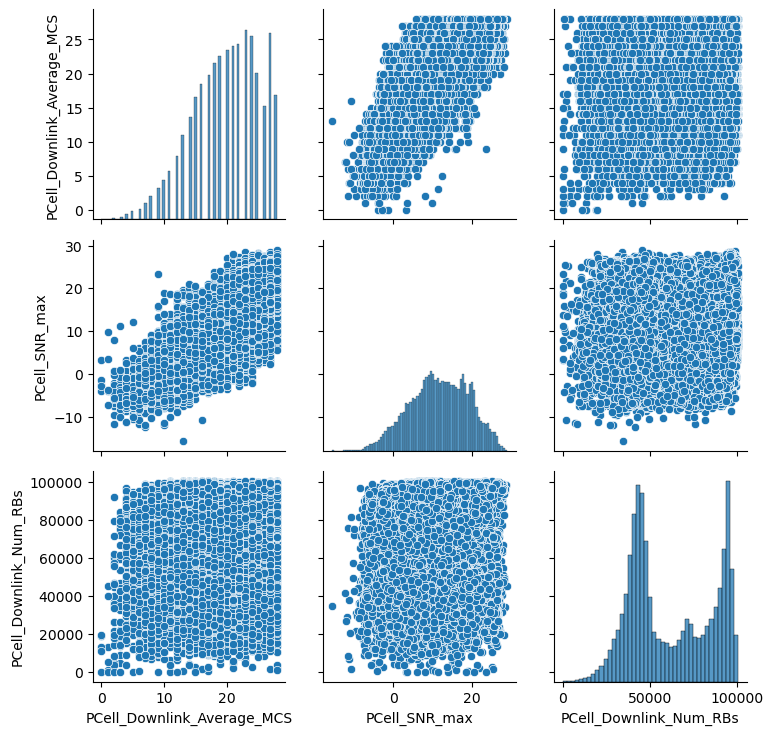

In [118]:
g = sns.PairGrid(data[['PCell_Downlink_Average_MCS','PCell_SNR_max','PCell_Downlink_Num_RBs']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<Axes: xlabel='PCell_Downlink_Average_MCS', ylabel='PCell_SNR_max'>

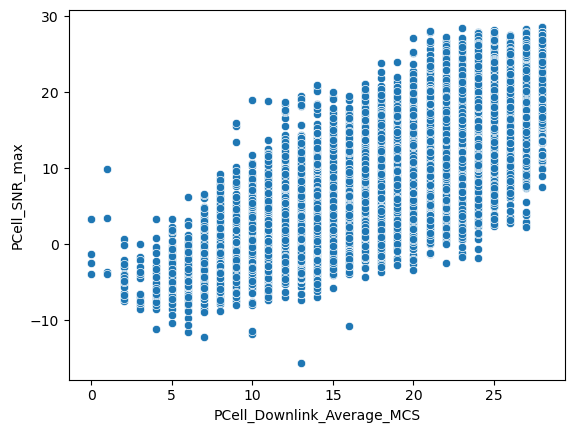

In [119]:
import seaborn as sns
sns.scatterplot(x=Train['PCell_Downlink_Average_MCS'],y=Train['PCell_SNR_max'])

C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

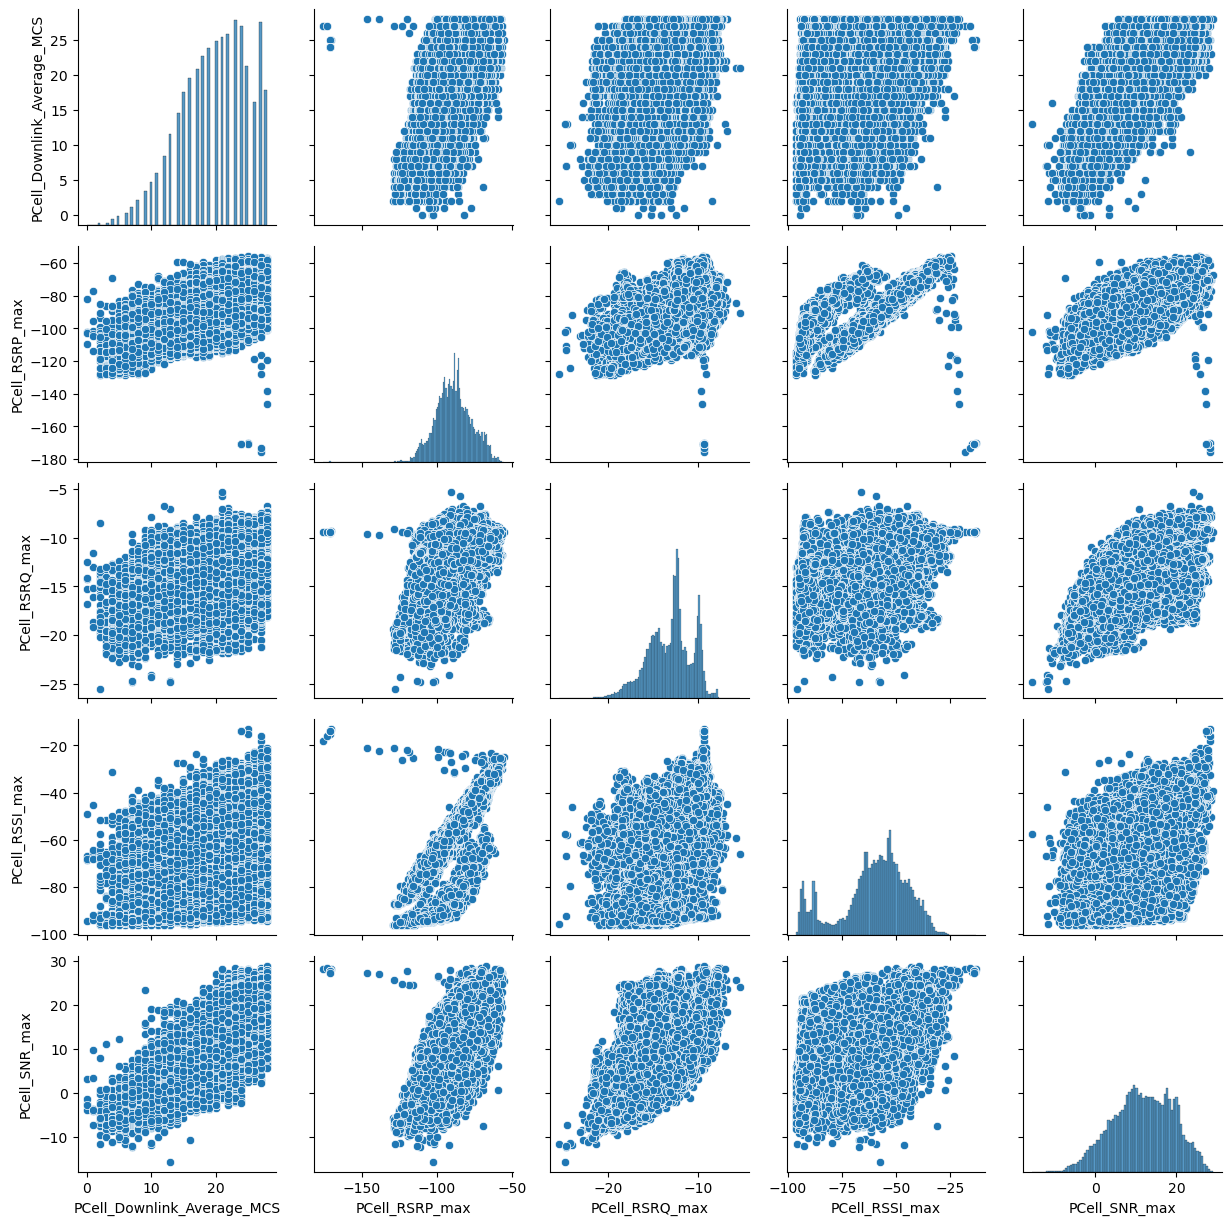

In [120]:
g = sns.PairGrid(data[['PCell_Downlink_Average_MCS','PCell_RSRP_max','PCell_RSRQ_max','PCell_RSSI_max','PCell_SNR_max']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [121]:
data[['PCell_RSRP_max','PCell_RSRQ_max','PCell_RSSI_max']].describe()

,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max
count,52517.000000,52517.000000,52517.000000
mean,-88.808839,-13.162359,-60.304413
std,11.805502,2.448779,15.577579
min,-175.605625,-25.439212,-96.388462
25%,-96.614375,-14.837500,-67.576250
50%,-88.872500,-12.774375,-57.936813
75%,-81.142500,-11.512500,-49.588125
max,-55.550625,-5.389375,-13.032500


In [122]:
data[['PCell_Downlink_Average_MCS','PCell_RSRP_max','PCell_RSRQ_max','PCell_RSSI_max','PCell_SNR_max']].head(3)

,PCell_Downlink_Average_MCS,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max
0,23.0,-84.498750,-14.586875,-49.855625,16.457
1,24.0,-86.818125,-11.982500,-54.838125,16.674
2,22.0,-101.916250,-13.257500,-71.241250,9.392


In [123]:
data[['SCell_SNR_max','SCell_Downlink_Num_RBs','SCell_Cell_Identity','SCell_RSRQ_max']].describe()

,SCell_SNR_max,SCell_Downlink_Num_RBs,SCell_Cell_Identity,SCell_RSRQ_max
count,28640.000000,27228.000000,1.828500e+04,28640.000000
mean,12.198950,66503.163875,2.370601e+07,-11.610701
std,7.133192,24275.574863,1.320025e+07,2.827780
min,-17.950000,1.000000,2.568966e+06,-30.000000
25%,7.762000,46800.000000,2.634752e+07,-12.560000
50%,13.070000,66320.000000,2.660711e+07,-10.584062
75%,17.045000,91544.000000,3.082880e+07,-9.810625
max,28.478000,99516.000000,5.184257e+07,-6.457849


C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gnapika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

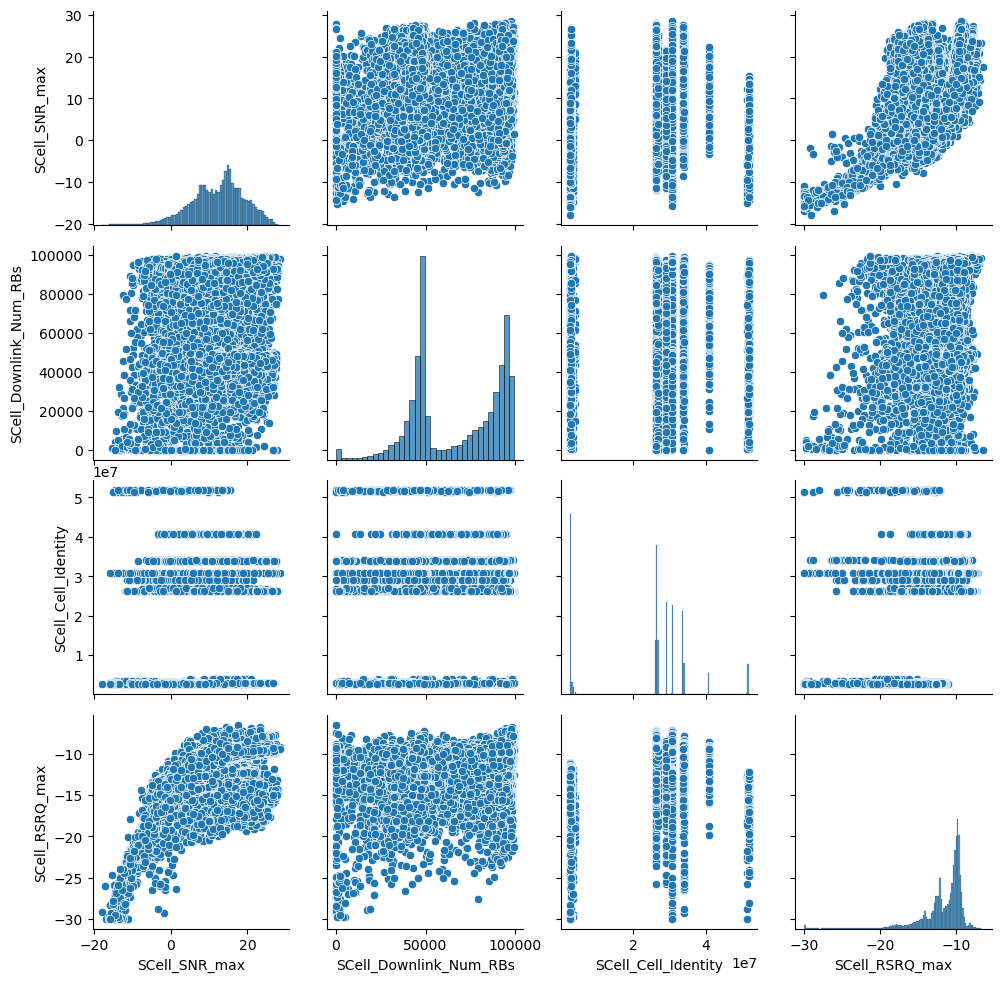

In [124]:
g = sns.PairGrid(data[['SCell_SNR_max','SCell_Downlink_Num_RBs','SCell_Cell_Identity','SCell_RSRQ_max']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## Feature Engeneering

In [125]:
Variables

,VARIABLENAME,VARIABLE DESCRIPTION
0,id,Unique ID for each row
1,timestamp,Unix timestamp in seconds
2,device,ID of the vehicle carrying the UE
3,PCell_RSRP_max,Maximum reference signal received power in dBm from the primary cell
4,PCell_RSRQ_max,Maximum reference signal received quality in dB from the primary cell
5,PCell_RSSI_max,Maximum received signal strength indicator in dBm from the primary cell
6,PCell_SNR_max,Maximum signal to noise ratio in dB from the primary cell
7,PCell_Downlink_Num_RBs,Aggregated number of received resource blocks in downlink from the primary cell
8,PCell_Downlink_TB_Size,Aggregated transport block size in downlink from the primary cell
9,PCell_Downlink_Average_MCS,Average modulation and coding scheme weighted by received resource blocks from the primary cell


## Results

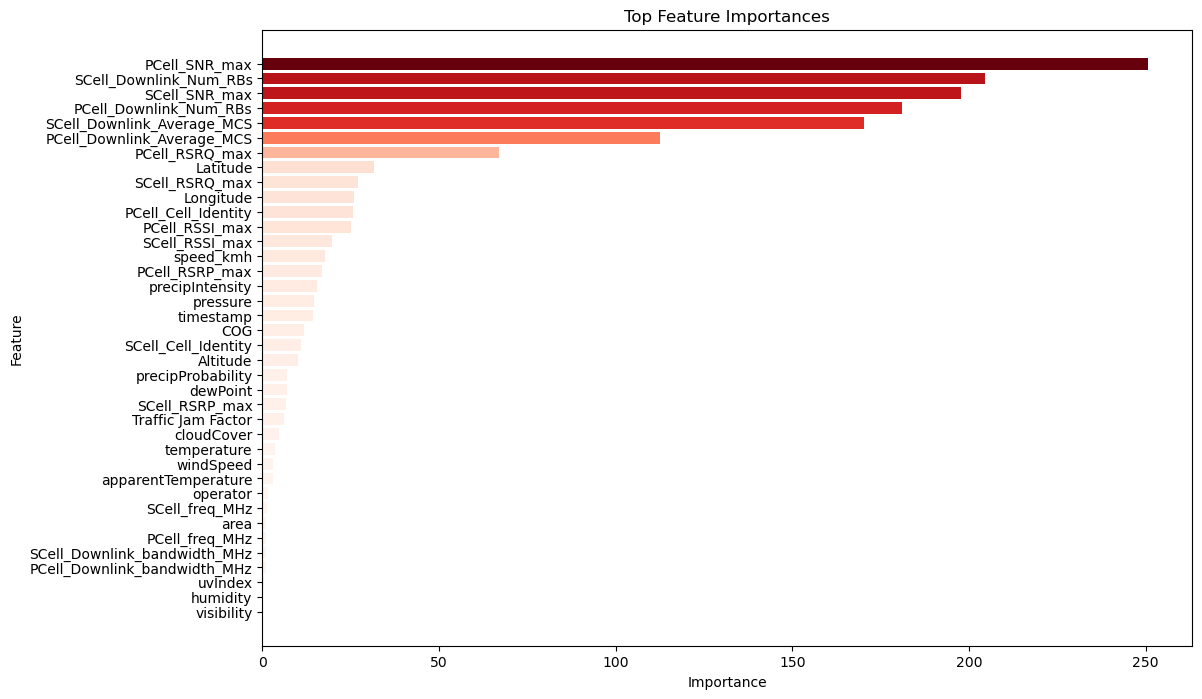

In [126]:
Baseline.plot_feature_importances()